In [ ]:
# Code to wrap output
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
import re
import numpy as np

In [ ]:
# # Install transformers
# !pip install transformers

In [ ]:
# Install ktrain
!pip install ktrain

     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 6.8MB 57.0MB/s 
     |████████████████████████████████| 983kB 30.7MB/s 
     |████████████████████████████████| 266kB 59.3MB/s 
     |████████████████████████████████| 1.9MB 47.8MB/s 
     |████████████████████████████████| 1.2MB 62.0MB/s 
     |████████████████████████████████| 471kB 65.9MB/s 
     |████████████████████████████████| 901kB 57.3MB/s 
     |████████████████████████████████| 3.3MB 38.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=b189149083e1c164b51503c2b2eee4931bd8788187603f575d76ec127a7d08ef
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=53db56c4705e4e9d4a98688c810b6b063ab6765df43d4ccedda167043adc2bd1
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
# # Load the pre-trained BERT Tokenizer and Sequence Classifier
# from transformers import BertTokenizer, TFBertForSequenceClassification
# from transformers import InputExample, InputFeatures

# # Build our model with the Sequence Classifier and our Tokenizer with BERT's Tokenizer
# model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
# # Summary of BERT model
# model.summary()

In [ ]:
# Import csv files (Manually from local machine)
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# # Import uploaded file into a dataframe
# import io
# df_train = pd.read_csv(io.BytesIO(uploaded['sentiment140_train.csv']), encoding = 'latin-1')
# df_test = pd.read_csv(io.BytesIO(uploaded['sentiment140_test.csv']))

In [ ]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# # Change to correct directory
import os
os.chdir("/content/drive/MyDrive")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 bert				      'Resume (1).gdoc'
'Colab Notebooks'		       Resume.gdoc
"Dawson's Documents.pdf"	       sentiment140_test.csv
'Pre-wedding Shoot'		       sentiment140_train.csv
'Quadratic Graphs Booklet.docx'        Takeout
'Quadratic Graphs Booklet.docx.gdoc'  'Video for Bell.mp4'


In [1]:
# Import files
df_train = pd.read_csv('vaccination_all_tweets.csv', header = None, encoding = 'latin-1', engine='python', error_bad_lines=False)
df_test = pd.read_csv('sentiment140_test.csv', header = None, encoding = 'latin-1', engine='python', error_bad_lines=False)

NameError: ignored

In [ ]:
# Rename and select revelant columns
df_train.rename(columns = {0:'sentiment', 5:'tweet'}, inplace = True)
df_train = df_train[['sentiment','tweet']]

# Print first 5 rows of training data
df_train.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Note that training data only has 0 and 4 for Sentiment 
print("Unique values for sentiment column:")
print(pd.unique(df_train['sentiment']))

Unique values for sentiment column:
[0 4]


In [ ]:
# Replace 0 and 4 with their definitions
df_train.loc[df_train["sentiment"] == 0,"sentiment"] = 'negative'
df_train.loc[df_train["sentiment"] == 4, "sentiment"] = 'positive'

# Print first 5 rows of training data
display(df_train.head())

print("\nUnique values for sentiment column:")
print(pd.unique(df_train['sentiment']))

,sentiment,tweet
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."



Unique values for sentiment column:
['negative' 'positive']


In [ ]:
# Print first 5 rows of test data
df_test.rename(columns = {0:'sentiment', 5:'tweet'}, inplace = True)
df_test = df_test[['sentiment','tweet']]
df_test.head()

,sentiment,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [ ]:
# Note that test data only has 0, 2 and 4 for Sentiment 
pd.unique(df_test['sentiment'])

array([4, 0, 2])

In [ ]:
# Remove rows where sentiment is 2
df_test = df_test[df_test['sentiment'] != 2]

# Replace 0 and 4 with their definitions
df_test.loc[df_test["sentiment"] == 0,"sentiment"] = 'negative'
df_test.loc[df_test["sentiment"] == 4, "sentiment"] = 'positive'

# Print first 5 rows of training data
display(df_test.head())

print("\nUnique values for sentiment column:")
print(pd.unique(df_test['sentiment']))

,sentiment,tweet
0,positive,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,Reading my kindle2... Love it... Lee childs i...
2,positive,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,@kenburbary You'll love your Kindle2. I've had...
4,positive,@mikefish Fair enough. But i have the Kindle2...



Unique values for sentiment column:
['positive' 'negative']


In [ ]:
# Print tweets
for i in range(20):
  print("Tweet " + str(i) + ": "+df_train["tweet"][i])

Tweet 0: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Tweet 1: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Tweet 2: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Tweet 3: my whole body feels itchy and like its on fire 
Tweet 4: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
Tweet 5: @Kwesidei not the whole crew 
Tweet 6: Need a hug 
Tweet 7: @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
Tweet 8: @Tatiana_K nope they didn't have it 
Tweet 9: @twittera que me muera ? 
Tweet 10: spring break in plain city... it's snowing 
Tweet 11: I just re-pierced my ears 
Tweet 12: @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .
Tweet 13: @octolinz16 It it cou

In [ ]:
### Clean dataset ###

## Step 1: Remove Twitter handles
df_train["cleaned_tweet"] = df_train["tweet"].str.replace('@[\w]*',"")
df_test["cleaned_tweet"] = df_test["tweet"].str.replace('@[\w]*',"")

# Remove leading and trailing whitespaces
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.strip() 
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.strip() 

print("Example of a Tweet:")
print(df_train["tweet"][1599999])

print("\nTwitter handles:")
print(re.findall(r'@[\w]*', df_train["tweet"][1599999]))

print("\nResults:")
df_train["cleaned_tweet"][1599999]

Example of a Tweet:
happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H 

Twitter handles:
['@theNSPCC', '@SparksCharity', '@SpeakingUpH4H']

Results:


'happy #charitytuesday'

As we can see, some of the unnecessary text and symbols to be removed are — username_tags(like @_WeMeanToClean), retweet symbol(RT), hashtags(like #MyCleanIndia), URLs(like https://t.co/XK3ZReâ\x80 ),numbers and punctuations .Some of the meaningful hashtags convey meaning and can have some sentiment in it after the word is segmented into useful parts (like #ILoveSwachhBharat). So, instead of removing all the words starting with hashtag symbols, only ‘#’ symbols are removed. We perform this text cleaning using re module in python. The re.sub() function searches for a pattern and replaces with the text we specify. We replace all these symbols with a whitespace character.

In [ ]:
## Step 2: Remove URLS
pattern = 'https?://[A-Za-z0-9./]+'
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.replace(pattern,"")
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.replace(pattern,"")

# Remove leading and trailing whitespaces
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.strip() 
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.strip() 

print("Example of a Tweet:")
print(df_train["tweet"][0])

print("\nURL:")
print(re.findall(pattern, df_train["tweet"][0]))

print("\nResults:")
df_train["cleaned_tweet"][0]

Example of a Tweet:
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

URL:
['http://twitpic.com/2y1zl']

Results:


"- Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
## Step 3: Remove punctuations, numbers and special characters (Remove # but keeping words after #)
pattern = '[^a-zA-Z\s]'
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.replace(pattern,"")
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.replace(pattern,"")

# Remove leading and trailing whitespaces
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.strip() 
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.strip() 

# Remove extra spaces
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.replace("\s{2,10}"," ")
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.replace("\s{2,10}"," ")

print("Example of a Tweet:")
print(df_train["tweet"][0])
print(df_train["tweet"][1599999])

print("\nPunctuations, numbers, special characters:")
print(re.findall(pattern, df_train["tweet"][0]))
print(re.findall(pattern, df_train["tweet"][1599999]))

print("\nResults:")
print(df_train["cleaned_tweet"][0])
print(df_train["cleaned_tweet"][1599999])

Example of a Tweet:
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H 

Punctuations, numbers, special characters:
['@', ':', '/', '/', '.', '/', '2', '1', '-', ',', "'", '.', '.', ';']
['#', '@', '@', '@', '4']

Results:
Awww thats a bummer You shoulda got David Carr of Third Day to do it D
happy charitytuesday


In [ ]:
## Step 4: Convert all words to lowercase
df_train["cleaned_tweet"] = df_train["cleaned_tweet"].str.lower()
df_test["cleaned_tweet"] = df_test["cleaned_tweet"].str.lower()

print("Example of a Tweet:")
print(df_train["tweet"][0])

print("\nResults:")
print(df_train["cleaned_tweet"][0])

Example of a Tweet:
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

Results:
awww thats a bummer you shoulda got david carr of third day to do it d


In [ ]:
# Print tweets
print("Tweets after cleaning: \n")
for i in range(20):
  print("Tweet " + str(i) + ": "+df_train["cleaned_tweet"][i])

Tweets after cleaning: 

Tweet 0: awww thats a bummer you shoulda got david carr of third day to do it d
Tweet 1: is upset that he cant update his facebook by texting it and might cry as a result school today also blah
Tweet 2: i dived many times for the ball managed to save the rest go out of bounds
Tweet 3: my whole body feels itchy and like its on fire
Tweet 4: no its not behaving at all im mad why am i here because i cant see you all over there
Tweet 5: not the whole crew
Tweet 6: need a hug
Tweet 7: hey long time no see yes rains a bit only a bit lol im fine thanks hows you
Tweet 8: nope they didnt have it
Tweet 9: que me muera
Tweet 10: spring break in plain city its snowing
Tweet 11: i just repierced my ears
Tweet 12: i couldnt bear to watch it and i thought the ua loss was embarrassing
Tweet 13: it it counts idk why i did either you never talk to me anymore
Tweet 14: i wouldve been the first but i didnt have a gun not really though zac snyders just a doucheclown
Tweet 15: i wis

In [ ]:
print("Training set:")
display(df_train.head())

print("\nTest set:")
display(df_test.head())

Training set:


,sentiment,tweet,cleaned_tweet
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david carr...
1,negative,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,negative,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...



Test set:


,sentiment,tweet,cleaned_tweet
0,positive,@stellargirl I loooooooovvvvvveee my Kindle2. ...,i loooooooovvvvvveee my kindle not that the dx...
1,positive,Reading my kindle2... Love it... Lee childs i...,reading my kindle love it lee childs is good read
2,positive,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment of the kindle it fucking rocks
3,positive,@kenburbary You'll love your Kindle2. I've had...,youll love your kindle ive had mine for a few ...
4,positive,@mikefish Fair enough. But i have the Kindle2...,fair enough but i have the kindle and i think ...


In [ ]:
# InputExample(guid=None,
#              text_a = "Hello, world",
#              text_b = None,
#              label = 1)

In [ ]:
# Reduce training set to 600 000 rows from 1 600 000 rows
# np.random.seed(0)
# random_indices = np.random.choice(df_train.shape[0], size = 100000)
# df_train_reduced = df_train.iloc[random_indices]
# df_train_reduced.shape

In [ ]:
# np.sum(df_train_reduced['sentiment'] == 'negative')

In [ ]:
# np.sum(df_train_reduced['sentiment'] == 'positive')

In [ ]:
# df_test.shape

In [ ]:
from ktrain import text
import ktrain

# text.texts_from_df?

Twitter has a 280 character limit which is approximately 55 words is 5.1 words as the average word length. The 5.1 figure comes from a research paper that analyzed word lengths using Google Books.

According to Google, if your
*   max seq length is 64, the recommended max batch side is 64
*   max seq length is 128, the recommended max batch side is 32
*   max seq length is 256, the recommended max batch side is 16

To be safe, we'll set the max seq length to 128 instead of 64 and use the recommended batch size of 32.

In [ ]:
# (x_train, y_train), (x_valid, y_valid), preproc = text.texts_from_df(train_df = df_train_reduced, 
(x_train, y_train), (x_valid, y_valid), preproc = text.texts_from_df(train_df = df_train, 
                                                                   text_column = 'cleaned_tweet',
                                                                   label_columns = 'sentiment',
                                                                  #  val_df = df_test,
                                                                   val_df = None,                    
                                                                   maxlen = 128, # max no of words
                                                                   val_pct = 0.2, # Percentage of train used for validation
                                                                   preprocess_mode = 'bert',
                                                                   random_state = 0)

['negative', 'positive']
         negative  positive
1519669       0.0       1.0
1245284       0.0       1.0
1299040       0.0       1.0
200654        1.0       0.0
699963        1.0       0.0
['negative', 'positive']
         negative  positive
557138        1.0       0.0
349381        1.0       0.0
182051        1.0       0.0
571236        1.0       0.0
1339637       0.0       1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
# name = "bert" means, here we are using BERT model.

# text.text_classifier?

model = text.text_classifier(name = 'bert',
                             train_data = (x_train, y_train),
                             metrics=['accuracy'],
                             preproc = preproc)

Is Multi-Label? False
maxlen is 128
done.


In [ ]:
# model.summary()

In [ ]:
# #Here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
# learner = ktrain.get_learner(model=model, train_data=(x_train, y_train),
#                    val_data = (x_test, y_test),
#                    batch_size = 6)

# Batch size of 32 as maxlen is 128
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_valid, y_valid),
                             batch_size=32)

## **Finding the Max Learning Rate**

In [ ]:
############ DON'T RUN ################
# Repeat with more epochs? ###########

# Find the maximum learning rate from plot
learner.lr_find(show_plot=True, max_epochs=1) 

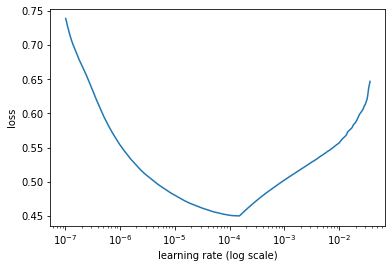

In [ ]:
# The n_skip_beginning and n_skip_end arguments to lr_plot can be used to zoom into the plot
# learner.lr_plot(n_skip_beginning, n_skip_end)   

learner.lr_plot()

In terms of artificial neural networks, an **epoch** refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs.

## **1CYCLE POLICY**

In [ ]:
############ DON'T RUN ################
# TESTING: 1CYCLE POLICY, EPOCH = 2   # 

# Try different training loops and compare their results

#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback
# learner.fit_onecycle(lr = 2e-5, epochs = 1)
# learner.fit_onecycle(lr = 1.2e-7, epochs = 3) #epochs = 3?

# Train the model (2 epochs)
learner.fit_onecycle(lr = 1e-4, epochs = 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
40000/40000 [==============================] - 15327s 383ms/step - loss: 0.3836 - accuracy: 0.8270 - val_loss: 0.6946 - val_accuracy: 0.5006
Epoch 2/2
40000/40000 [==============================] - 15210s 380ms/step - loss: 0.6953 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5006


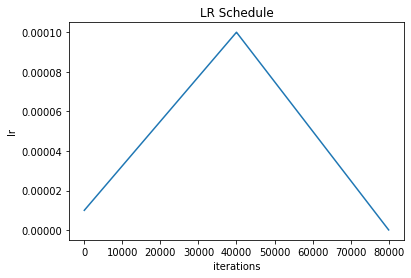

In [ ]:
# Plot training learning rate schedule      
learner.plot('lr')

In [ ]:
# View top 3 most misclassified examples in our validation set
learner.view_top_losses(n=3, preproc=preproc)

----------
id:4609 | loss:0.7 | true:negative | pred:positive)

[CLS] is fed up of my nana buying me new shoes [SEP]
----------
id:12895 | loss:0.7 | true:negative | pred:positive)

[CLS] twitter app in facebook k ##la ##pp ##t bei mir nic ##ht [SEP]
----------
id:18293 | loss:0.7 | true:negative | pred:positive)

[CLS] wow that ##s gay and ex ##tre ##ml ##y homo [SEP]


In [ ]:
# View performance on validation data
learner.validate(val_data=(x_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    159815
           1       0.50      1.00      0.67    160185

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



array([[     0, 159815],
       [     0, 160185]])

In [ ]:
# Alias for self.validate()

#View performance on validation data 
learner.evaluate()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    159815
           1       0.50      1.00      0.67    160185

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



array([[     0, 159815],
       [     0, 160185]])

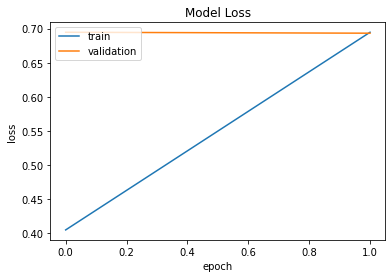

In [ ]:
# Plot graph of loss vs epochs for training and validation set
learner.plot()

In [ ]:
# Makes prediction on validation set
learner.predict()

# valid_preds = learner.predict()
# len(valid_preds), df_train.shape, valid_preds[:5]

In [ ]:
print([i for i in dir(learner) if i[0]!='_']) # Options for learner.(function)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
40000/40000 [==============================] - 14980s 375ms/step - loss: 0.3787 - accuracy: 0.8312 - val_loss: 0.3989 - val_accuracy: 0.8178
Epoch 2/2
40000/40000 [==============================] - 14961s 374ms/step - loss: 0.6867 - accuracy: 0.5162 - val_loss: 0.7050 - val_accuracy: 0.5006


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    159815
           1       0.50      1.00      0.67    160185

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



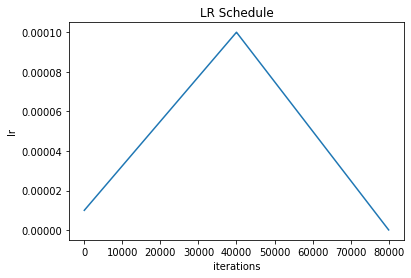

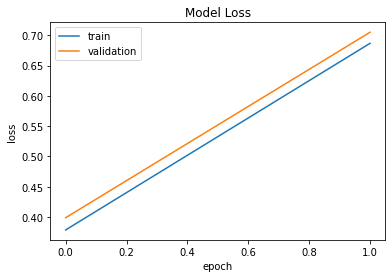

In [ ]:
############ DON'T RUN  ################
# TESTING: 1CYCLE POLICY, EPOCH = 2   # 

# RESET MODEL BEFORE RUNNING TRAINING

# Train the model (1 epochs)
learner.fit_onecycle(lr = 1e-4, epochs = 2)

#View performance on validation data 
learner.evaluate()

# Plot training learning rate schedule      
learner.plot('lr')

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

In [ ]:
############ RUN THIS LATER ################
# TESTING: 1CYCLE, EPOCH = 1   # 

# RESET MODEL BEFORE RUNNING TRAINING

# Train the model (1 epochs)
learner.fit_onecycle(lr = 1e-4, epochs = 1)

#View performance on validation data 
learner.evaluate()

# Plot training learning rate schedule      
learner.plot('lr')

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

# Get predictor
predictor = ktrain.get_predictor(learner.model, preproc = preproc)

# Save your predictor
predictor.save('/content/drive/MyDrive/bert/predictor-1cycle')



begin training using onecycle policy with max lr of 0.0001...


In [ ]:
# View top 3 most misclassified examples in our validation set
learner.view_top_losses(n=3, preproc=preproc)

## **AUTOFIT**



begin training using triangular learning rate policy with max lr of 0.0001...
40000/40000 [==============================] - 23932s 598ms/step - loss: 0.3906 - accuracy: 0.8237 - val_loss: 0.3429 - val_accuracy: 0.8498
              precision    recall  f1-score   support

           0       0.85      0.85      0.85    159815
           1       0.85      0.85      0.85    160185

    accuracy                           0.85    320000
   macro avg       0.85      0.85      0.85    320000
weighted avg       0.85      0.85      0.85    320000



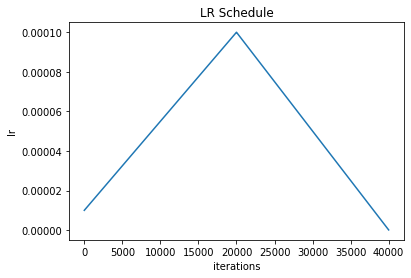

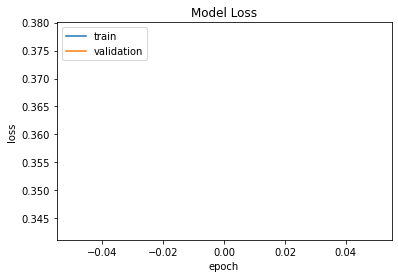

In [ ]:
############ DON'T RUN ################
# TESTING: AUTOFIT, EPOCH = 1   # 

# RESET MODEL BEFORE RUNNING TRAINING

# Train the model (1 epochs)
learner.autofit(lr = 1e-4, epochs = 1)
# learner.autofit(lr = 1e-4, early_stopping = 2)

#View performance on validation data 
learner.evaluate()

# Plot training learning rate schedule      
learner.plot('lr')

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

# Get predictor
predictor = ktrain.get_predictor(learner.model, preproc = preproc)

# Save your predictor
predictor.save('/content/drive/MyDrive/bert/predictor-autofit')

In [ ]:
# Load your predictor
predictor_load = ktrain.load_predictor('/content/drive/MyDrive/bert/predictor-autofit')

In [ ]:
# Predict with test data
predicted_labels = predictor.predict(df_test["cleaned_tweet"].tolist())
accuracy = np.sum(df_test["sentiment"] == predicted_labels)/len(predicted_labels)
print("Test accuracy: " + str(round(accuracy*100)) + "%")

Test accuracy: 84%


In [ ]:
############ RUN THIS LATER ################
# TESTING: AUTOFIT, EARLY_STOPPING = 2, REDUCE_ON_PLATEAU = 1 # 

# RESET MODEL BEFORE RUNNING TRAINING

# Train the model (1 epochs)
# learner.autofit(lr = 1e-4, epochs = 1)
learner.autofit(lr = 1e-4, early_stopping = 2, reduce_on_plateau = 1)

#View performance on validation data 
learner.evaluate()

# Plot training learning rate schedule      
learner.plot('lr')

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

# Get predictor
predictor = ktrain.get_predictor(learner.model, preproc = preproc)

# Save your predictor
predictor.save('/content/drive/MyDrive/bert/predictor-autofit-stop-reduce')

## **SGDR**

In [ ]:
############ DON'T RUN ################
# TESTING: SGDR, NO. CYCLE = 1   # 

# RESET MODEL BEFORE RUNNING TRAINING

# Train the model (1 cycle)
learner.fit(lr = 1e-4, n_cycles = 1)

#View performance on validation data 
learner.evaluate()

# Plot training learning rate schedule      
# learner.plot('lr')

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

# Get predictor
predictor = ktrain.get_predictor(learner.model, preproc = preproc)

# Save your predictor
predictor.save('/content/drive/MyDrive/bert/predictor-sgdr1')

40000/40000 [==============================] - 23492s 587ms/step - loss: 0.5818 - accuracy: 0.6407 - val_loss: 0.6936 - val_accuracy: 0.4994


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    159815
           1       0.00      0.00      0.00    160185

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



ValueError: ignored

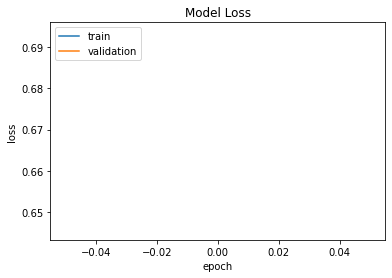

In [ ]:

# Plot graph of loss vs epochs for training and validation set
learner.plot()

# Makes prediction on validation set
# learner.predict()

# Get predictor
predictor = ktrain.get_predictor(learner.model, preproc = preproc)

# Save your predictor
predictor.save('/content/drive/MyDrive/bert/predictor-sgdr1')

In [ ]:
# Load your predictor
predictor_load = ktrain.load_predictor('/content/drive/MyDrive/bert/predictor-sgdr1')

In [ ]:
# Predict with test data
predicted_labels = predictor.predict(df_test["cleaned_tweet"].tolist())
accuracy = np.sum(df_test["sentiment"] == predicted_labels)/len(predicted_labels)
print("Test accuracy: " + str(round(accuracy*100)) + "%")

Test accuracy: 49%


## Model prediction on Test Data

In [ ]:
# Predict 
predictor = ktrain.get_predictor(learner.model, preproc = preproc)


In [ ]:
[i for i in dir(predictor) if i[0]!='_'] # options for predictor.(function)

In [ ]:
predictor.get_classes()

In [ ]:
data = ['i am really sad today! help me',
             'what a great day it is today',
             'omg it is snowing today']

In [ ]:
predictor.predict(data)
predictor.predict(data_test)

In [ ]:
# See explaining text classification
predictor.explain(data[0])

In [ ]:
# Save your predictor
predictor.save('/content/bert')

In [ ]:
#loading the model

predictor_load = ktrain.load_predictor('/content/bert')

In [ ]:
#predicting the data

predictor_load.predict(data)

['negative', 'positive', 'negative']